In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_utils
sns.set_style("darkgrid")

# Helper functions

In [2]:
ETA_LATEX = r"$\overline{\eta}$"
RENAME_DICT = {
    "test_acc": "Test Accuracy",
    "train_acc": "Train Accuracy",
    "alpha_cor_mf": "Capacity",
    "R_M_cor": "Radius",
    "D_M_cor": "Dimension",
    "cor_center": "Center Alignment",
    "cor_axes": "Axes Alignment",
    "cor_center_axes": "Center-Axes Alignment",
    "severity": "Severity",
    "corruption": "Corruption",
    "eta": ETA_LATEX,
    "normalized_weight_diff": "Relative Norm Change",
    "activation_stability": "Activation Stability",
    "capacity": "Capacity",
    "radius": "Radius",
    "dimension": "Dimension",
    "center_alignment": "Center Alignment",
    "axes_alignment": "Axes Alignment",
    "center_axes_alignment": "Center-Axes Alignment"
}
MAX_EPOCH = 100
GEOMETRY_COLS = ['Capacity', 'Dimension', 'Radius', 'Center Alignment', 'Axes Alignment', 'Center-Axes Alignment']
IDX_COLS = ['alpha', 'seed', 'subSeed', 'epoch']

In [3]:
def plot_results_sns(input_df, plot_var, x, cols_to_plot, query="", figsize=(3,4), use_log=True, colormap=None, fig_title=None, plus_one=True, xlabel=None, plot_sem=False, marker=None, model_cols=[], col_title="", horizontal=True):
    fig_height, fig_width = figsize
    if len(query) > 0:
        df = input_df.query(query).copy()
    else:
        df = input_df.copy()
    var_list = sorted(df[plot_var].unique())
    if colormap is None:
        colors = sns.cubehelix_palette(len(var_list))
    else:
        colors = sns.color_palette(colormap, len(var_list))
    try:
        if all(val.is_integer() for val in df[plot_var]):
            df[plot_var] = df[plot_var].apply(lambda x: str(int(x)))
            hue_order = [str(i) for i in sorted([int(j) for j in df[plot_var].unique()])]
        else:
            df[plot_var] = df[plot_var].apply(lambda x: str(round(float(x),3)))
            hue_order = [str(i) for i in sorted([float(j) for j in df[plot_var].unique()])]
    except:
        hue_order = [str(i) for i in sorted([j for j in df[plot_var].unique()])]
        df[plot_var] = df[plot_var].apply(lambda x: str(x))
    if horizontal:
        fig, axs = plt.subplots(1, len(cols_to_plot))
        fig.set_figheight(fig_height)
        fig.set_figwidth(len(cols_to_plot)*fig_width)
    else:
        fig, axs = plt.subplots(len(cols_to_plot), 1)
        fig.set_figwidth(fig_width)
        fig.set_figheight(len(cols_to_plot)*fig_height)

    if len(cols_to_plot) == 1:
        axs = [axs]
    if plus_one:
        df[x] = df[x] + 1
    for i, col in enumerate(cols_to_plot):
        if col in model_cols:
            df_col = df.copy()[[plot_var, x, "seed", col]].drop_duplicates() # model cols have no `subSeed`
        else:
            df_col = df.copy()
        if i == 0:
            sns.lineplot(df_col, x=x, y=col, hue=plot_var, legend="full", ax=axs[i], hue_order=hue_order, palette=colors, marker=marker, dashes=False)
            axs[i].legend(bbox_to_anchor=(1.2, 1), title=plot_var, title_fontsize=16)
        if i < len(cols_to_plot) - 1:
            sns.lineplot(df_col, x=x, y=col, hue=plot_var, legend=False, ax=axs[i], hue_order=hue_order, palette=colors, marker=marker, dashes=False)
        else:
            sns.lineplot(df_col, x=x, y=col, hue=plot_var, legend=False, ax=axs[i], hue_order=hue_order, palette=colors, marker=marker, dashes=False)
        axs[i].set_title(col + col_title)
        if use_log:
            axs[i].set_xscale('log')

    if fig_title is None:
        if len(query) > 0:
            fig.suptitle(query)
    else:
        fig.suptitle(fig_title)
    plt.tight_layout()
    return fig

def plot_heatmap(df, title=""):
    plt.matshow(df, cmap ="Blues")
    plt.colorbar() 
    # Assigning labels of x-axis according to dataframe 
    plt.xticks(range(len(df.columns)), df.columns, fontsize=8)
    plt.xlabel(ETA_LATEX, fontsize=14)
    # Assigning labels of y-axis according to dataframe 
    plt.yticks(range(len(df.index)), df.index) 
    # Displaying the figure
    plt.grid(False)
    plt.title(title)
    plt.show()


## Model training results

In [4]:
# vgg
model_training_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/model_training/training_state"
model_training_template = "alpha-{alpha}_decay-0.0_lr-1.0_model-VGG11_optim-SGD_seed-{seed}_task-CIFAR-10.pkl"

In [5]:
model_training_df = plot_utils.load_results_to_df(model_training_folder, model_training_template, sub_folders=False)
# get average proportion lazy
model_training_df["activation_stability"] = model_training_df["proportion_lazy"].apply(lambda x: sum(x) / len(x))
model_training_df = model_training_df.drop(columns=["proportion_lazy"])
display(model_training_df)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/model_training/training_state/alpha-_decay-0.0_lr-1.0_model-VGG11_optim-SGD_seed-_task-CIFAR-10.pkl'


,alpha,seed,epoch,train_loss,train_loss_scaled,train_acc,test_loss,test_loss_scaled,test_acc,grad_norm,weight_norm,activation_stability
0,2.0,37,0,0.100000,0.025000,10.000,0.100000,0.025000,10.00,NaN,49.145736,1.000000
1,2.0,37,1,0.082238,0.019323,35.566,0.073120,0.016008,50.14,0.059137,49.352952,0.659995
2,2.0,37,2,0.070273,0.015242,53.348,0.067563,0.014254,58.47,0.052306,49.603732,0.642272
3,2.0,37,3,0.062607,0.012627,62.916,0.059150,0.011480,67.98,0.048841,49.828146,0.632355
4,2.0,37,4,0.057815,0.011019,68.268,0.055447,0.010071,72.57,0.054236,50.014654,0.627830
...,...,...,...,...,...,...,...,...,...,...,...,...
6055,2.0,17,96,0.029089,0.001317,97.158,0.037587,0.004919,87.02,0.041635,52.083351,0.616668
6056,2.0,17,97,0.029049,0.001304,97.284,0.037438,0.004890,87.27,0.040675,52.087533,0.616452
6057,2.0,17,98,0.029101,0.001325,97.164,0.037583,0.004959,87.21,0.070670,52.091847,0.616914
6058,2.0,17,99,0.029023,0.001298,97.278,0.037598,0.004929,87.03,0.047724,52.095986,0.616142


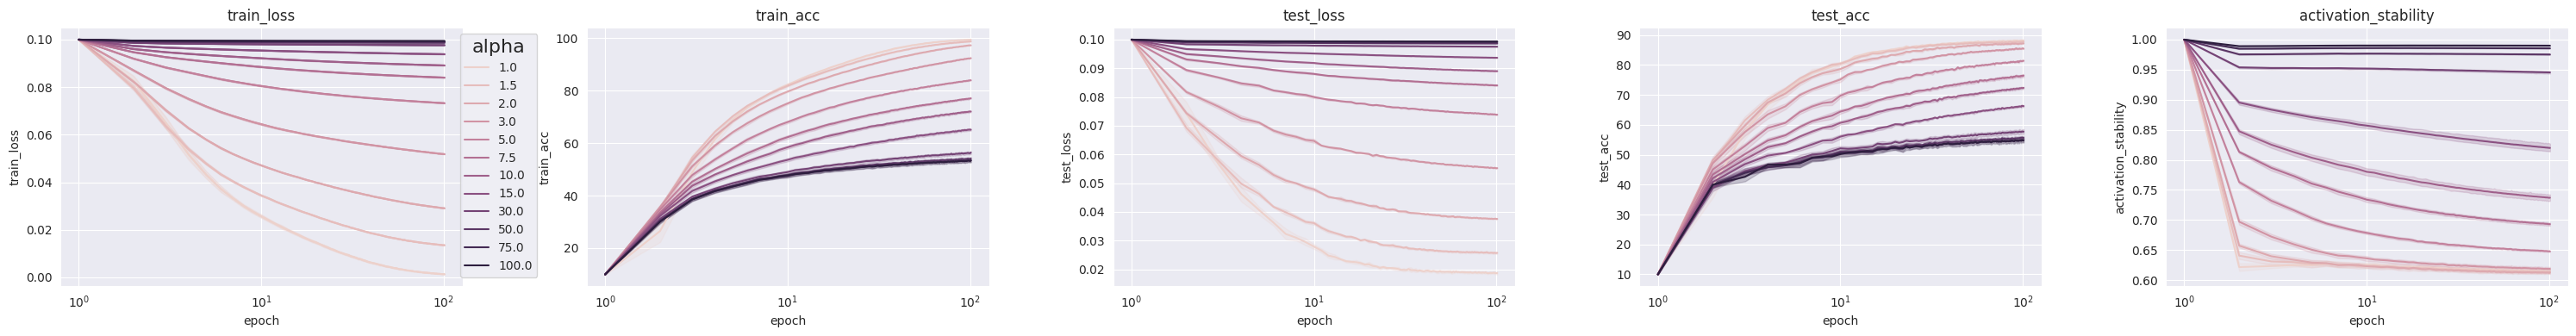

In [6]:
cols_to_plot = ['train_loss', 'train_acc', 'test_loss', 'test_acc', 'activation_stability']
fig = plot_results_sns(model_training_df, "alpha", "epoch", cols_to_plot, figsize=(4,6))

## Feature analysis results

### Manifold capacity and manifold geometry metrics

In [10]:
# vgg11
capacity_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/feature_analysis"
capacity_template = "result_alpha-{alpha}_decay-0.0_fsData-CIFAR-10_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-{seed}_subSeed-{subSeed}_task-CIFAR-10_epoch_{epoch}.pkl"
glob_pattern = "alpha-*_decay-0.0_fsData-CIFAR-10_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-*_subSeed-*_task-CIFAR-10"

In [11]:
capacity_df = plot_utils.load_results_to_df(capacity_folder, capacity_template, sub_folders=True, glob_pattern=glob_pattern)
capacity_df = capacity_df.rename(columns={key: val for (key,val) in RENAME_DICT.items() if key in capacity_df.columns})

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/feature_analysis/alpha-_decay-0.0_fsData-CIFAR-10_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-_subSeed-_task-CIFAR-10.pkl'


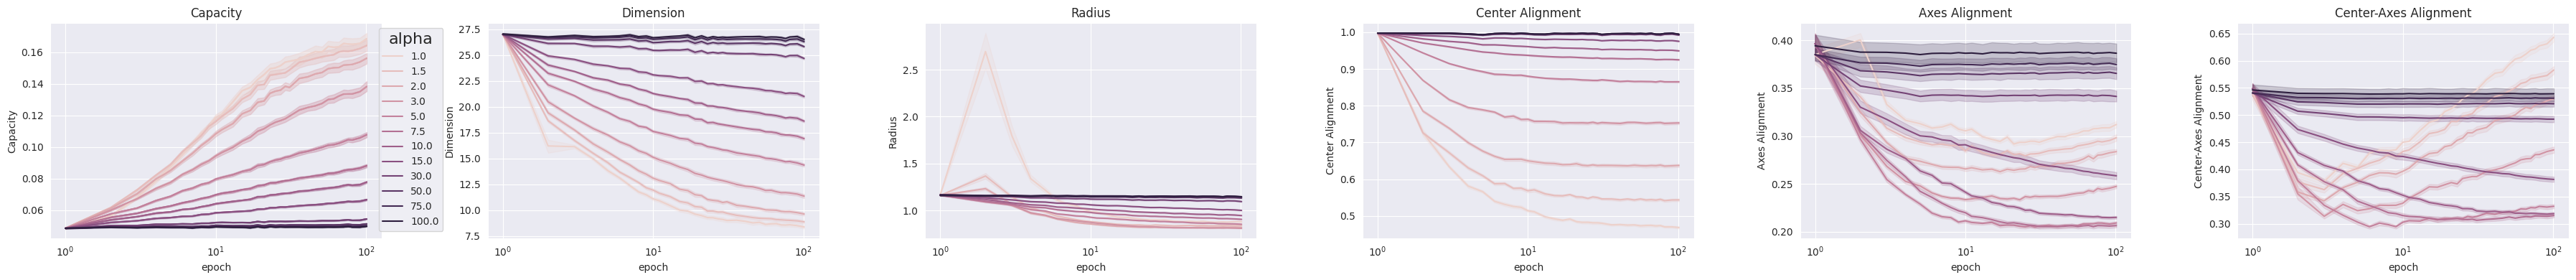

In [12]:
plot_df = capacity_df[IDX_COLS+GEOMETRY_COLS]
fig = plot_results_sns(capacity_df, "alpha", "epoch", GEOMETRY_COLS, figsize=(4,6))

### Weight-based metrics

In [13]:
# vgg
weight_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/weight_analysis"
weight_template = "alpha-{alpha}_decay-0.0_lr-1.0_model-VGG11_optim-SGD_seed-{seed}_task-CIFAR-10.pkl"
weight_df = plot_utils.load_results_to_df(weight_folder, weight_template, sub_folders=False)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/weight_analysis/alpha-_decay-0.0_lr-1.0_model-VGG11_optim-SGD_seed-_task-CIFAR-10.pkl'


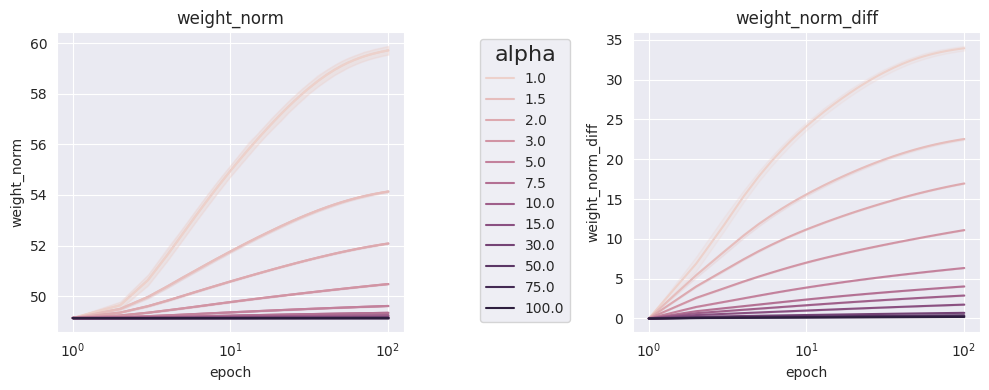

In [14]:
cols_to_plot = ["weight_norm", "weight_norm_diff"]
fig = plot_results_sns(weight_df, "alpha", "epoch", cols_to_plot, figsize=(4,5))

### Kernel-based metrics

In [15]:
# vgg
kernel_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/kernels"
kernel_template = "alpha-{alpha}_decay-0.0_lr-1.0_model-VGG11_numCls-10_optim-SGD_seed-{seed}_task-CIFAR-10.pkl"
kernel_df = plot_utils.load_results_to_df(kernel_folder, kernel_template, sub_folders=False)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/kernels/alpha-_decay-0.0_lr-1.0_model-VGG11_numCls-10_optim-SGD_seed-_task-CIFAR-10.pkl'


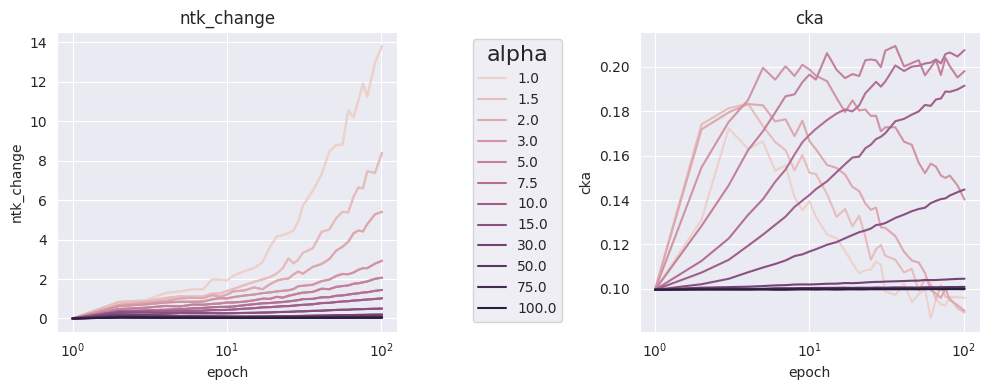

In [16]:
cols_to_plot = ["ntk_change", "cka"]
fig = plot_results_sns(kernel_df, "alpha", "epoch", cols_to_plot, figsize=(4,5))

## CIFAR-100 dataset

### Linear probe results

In [20]:
# vgg11
linear_probe_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/linear_probe/training_state"
linear_probe_template = "alpha-{alpha}_decay-0.0_fsData-CIFAR-100_lr-1.0_model-VGG11_numCls-10_optim-SGD_seed-{seed}_task-CIFAR-10_epoch_{epoch}.pkl"

In [21]:
linear_probe_df = plot_utils.load_results_to_df(linear_probe_folder, linear_probe_template, sub_folders=True)
display(linear_probe_df)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/linear_probe/training_state/alpha-_decay-0.0_fsData-CIFAR-100_lr-1.0_model-VGG11_numCls-10_optim-SGD_seed-_task-CIFAR-10_epoch_.pkl'


,alpha,seed,epoch,epoch_lp,train_loss,train_acc,test_loss,test_acc
0,7.5,13,100,0,4.605515,1.204,4.605619,1.21
1,7.5,13,100,1,3.564935,16.434,3.198427,22.57
2,7.5,13,100,2,3.129313,24.116,3.024718,25.91
3,7.5,13,100,3,2.989901,26.680,2.921951,28.14
4,7.5,13,100,4,2.913039,28.250,2.867187,29.07
...,...,...,...,...,...,...,...,...
2744,50.0,13,100,45,3.504731,18.850,3.449482,20.09
2745,50.0,13,100,46,3.502696,19.080,3.446453,20.10
2746,50.0,13,100,47,3.502495,19.024,3.441335,20.38
2747,50.0,13,100,48,3.504234,18.796,3.448415,20.32


In [22]:
max_col = "test_acc"
group_by_cols = ["alpha", "epoch", "seed"]
linear_probe_max = linear_probe_df.groupby(group_by_cols).idxmax()
idx = list(linear_probe_max[max_col])
linear_probe_max["train_acc"] = list(linear_probe_df["train_acc"][idx])
linear_probe_max["train_loss"] = list(linear_probe_df["train_loss"][idx])
linear_probe_max["test_loss"] = list(linear_probe_df["test_loss"][idx])
linear_probe_max["test_acc"] = list(linear_probe_df["test_acc"][idx])
linear_probe_max = linear_probe_max.reset_index()

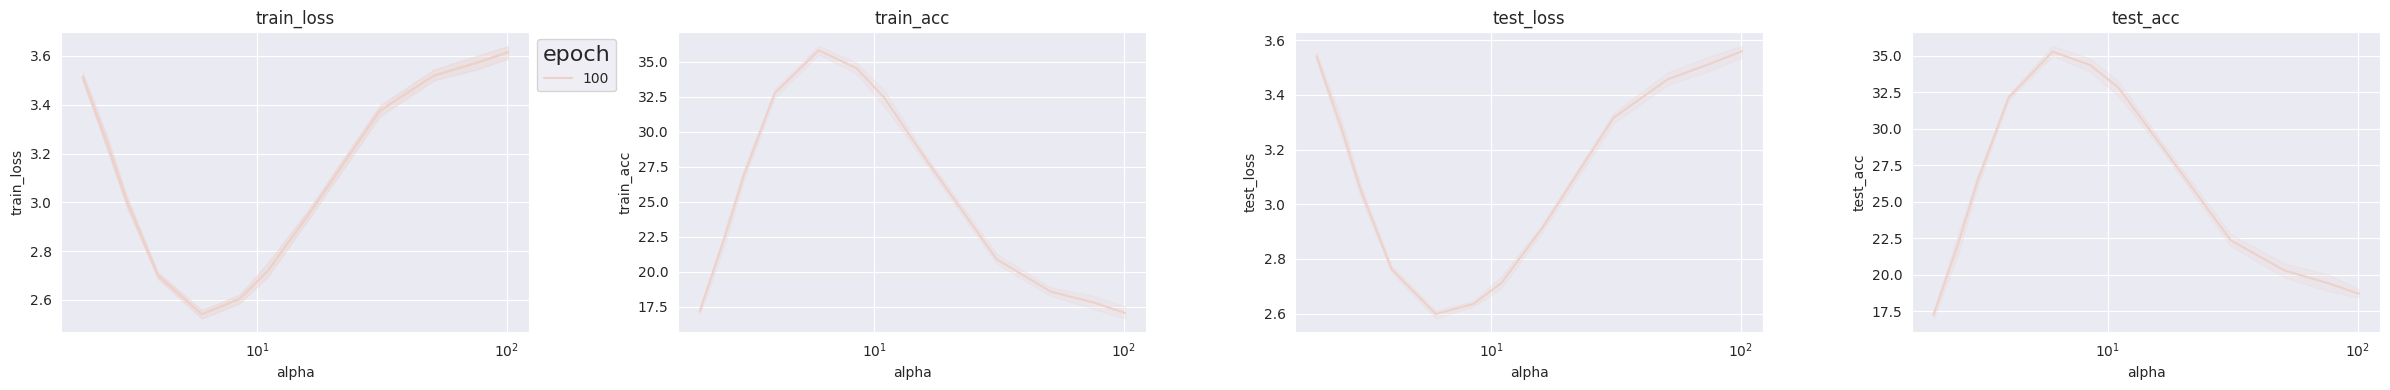

In [23]:
cols_to_plot = ['train_loss', 'train_acc', 'test_loss', 'test_acc']
fig = plot_results_sns(linear_probe_max, "epoch", "alpha", cols_to_plot, figsize=(4,6))

### Manifold capacity and manifold geometry

In [24]:
# vgg11
lp_capacity_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/linear_probe/capacity"
lp_capacity_template = "alpha-{alpha}_decay-0.0_fsData-CIFAR-100_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-{seed}_subSeed-{subSeed}_task-CIFAR-10_epoch_{epoch}.pkl"
lp_glob_pattern = "alpha-*_decay-0.0_fsData-CIFAR-100_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-*_subSeed-*_task-CIFAR-10"

In [25]:
lp_capacity_df = plot_utils.load_results_to_df(lp_capacity_folder, lp_capacity_template, sub_folders=True, glob_pattern=lp_glob_pattern)
lp_capacity_df = lp_capacity_df.rename(columns={key: val for (key,val) in RENAME_DICT.items() if key in lp_capacity_df.columns})
display(lp_capacity_df)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/linear_probe/capacity/alpha-_decay-0.0_fsData-CIFAR-100_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-_subSeed-_task-CIFAR-10.pkl'


,alpha,seed,subSeed,epoch,Capacity,Radius,Dimension,D_M_cor_single,ell_M_cor,R_raw_M_cor,...,cor_center_axes_ori,main,prepare_manifold_data,capacity_sampling,corr_geometry,minimize_quad_form,get_constraint_matrix,solve_qp,summarize_results,layer
0,1.5,7,49,100,0.054793,1.213829,21.699045,81.237869,0.401887,0.487822,...,0.081392,210.956067,0.988024,81.886508,82.273471,52.538822,9.296808,43.239485,128.081282,view
1,5.0,7,49,100,0.066969,1.013491,20.501710,99.723024,0.351640,0.356384,...,0.085313,156.436757,0.710210,73.155310,73.448455,43.626551,9.391659,34.223743,82.570951,view
2,15.0,13,27,100,0.065213,1.000277,21.354675,91.809211,0.300604,0.300687,...,0.079880,178.527205,1.018442,77.582523,77.863942,46.589272,10.081271,36.505315,99.925958,view
3,2.0,7,18,100,0.052849,1.188748,23.031603,88.844356,0.399346,0.474721,...,0.083192,236.117210,0.749898,80.005514,80.365077,49.673998,9.053333,40.617679,155.361432,view
4,1.5,37,18,100,0.055025,1.241015,21.634332,77.533786,0.461090,0.572220,...,0.080534,224.627677,0.647673,75.978265,76.229125,46.994605,8.189435,38.802594,148.001454,view
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,10.0,17,98,100,0.063215,1.009978,21.778601,97.725723,0.333926,0.337258,...,0.084820,176.112745,0.569336,68.841829,69.004173,40.428528,8.086108,32.339817,106.701302,view
596,75.0,47,64,100,0.053397,1.107839,25.040099,119.815599,0.301088,0.333558,...,0.055559,222.405278,0.274438,69.554210,69.674247,41.474849,8.383722,33.088466,152.576344,view
597,3.0,13,82,100,0.064532,1.041982,20.530136,90.175318,0.387597,0.403869,...,0.083337,173.819622,0.763294,78.615608,78.888685,47.890594,10.373937,37.513958,94.440401,view
598,3.0,13,90,100,0.060149,1.086105,21.521745,94.761380,0.389611,0.423159,...,0.084302,186.754252,1.462800,87.734631,88.107362,53.696127,10.991546,42.701993,97.556528,view


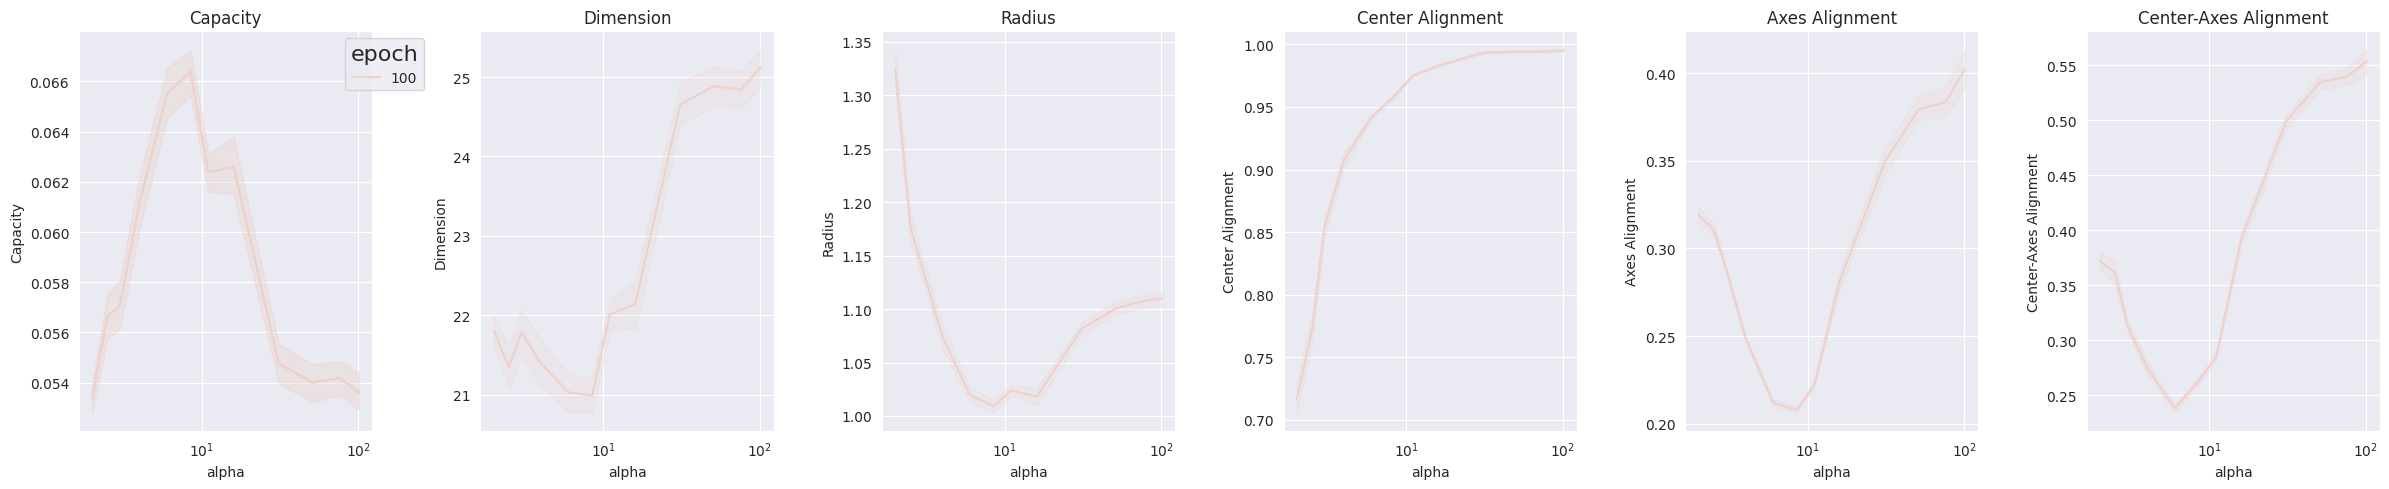

In [26]:
plot_df = lp_capacity_df[IDX_COLS+GEOMETRY_COLS]
fig = plot_results_sns(plot_df, "epoch", "alpha", GEOMETRY_COLS, figsize=(5,4))

## CIFAR-10C dataset

### Corruption evaluation results

In [28]:
# VGG11
eval_corrupt_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/eval_corrupt/model_eval"
eval_corrupt_template = "alpha-{alpha}_decay-0.0_fsData-{corruption}_lr-1.0_model-VGG11_optim-SGD_seed-{seed}_task-CIFAR-10.pkl"
eval_corrupt_df = plot_utils.load_results_to_df(eval_corrupt_folder, eval_corrupt_template, sub_folders=False)
display(eval_corrupt_df)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/eval_corrupt/model_eval/alpha-_decay-0.0_fsData-_lr-1.0_model-VGG11_optim-SGD_seed-_task-CIFAR-10.pkl'


,alpha,corruption,seed,epoch,severity,test_loss,test_acc,test_loss_scaled
0,30.0,glass_blur,7,100,3,0.097780,54.18,0.000072
1,30.0,glass_blur,7,100,1,0.097680,53.39,0.000073
2,30.0,glass_blur,7,100,2,0.097691,53.62,0.000073
3,30.0,glass_blur,7,100,4,0.097757,50.92,0.000076
4,30.0,glass_blur,7,100,5,0.097832,52.48,0.000074
...,...,...,...,...,...,...,...,...
4495,10.0,glass_blur,47,100,3,0.091454,60.33,0.000554
4496,10.0,glass_blur,47,100,1,0.092283,52.12,0.000643
4497,10.0,glass_blur,47,100,2,0.092157,53.53,0.000627
4498,10.0,glass_blur,47,100,4,0.093568,42.27,0.000758


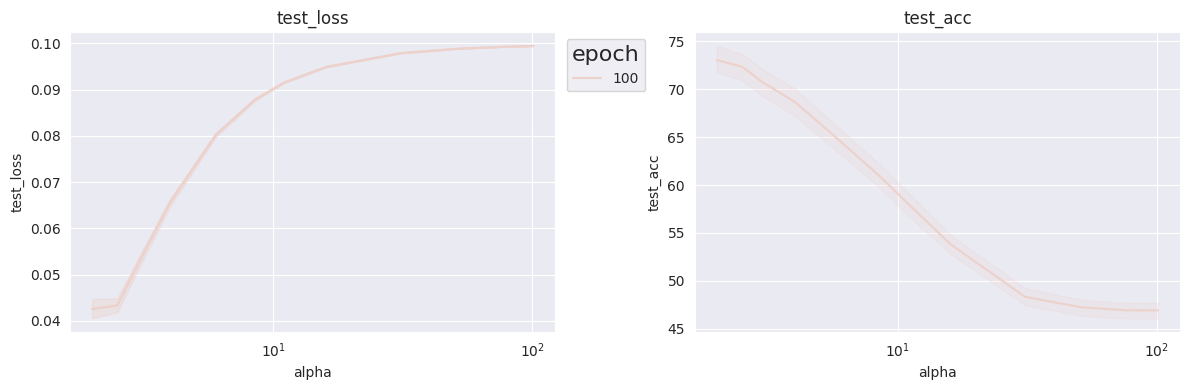

In [29]:
cols_to_plot = ['test_loss', 'test_acc']
fig = plot_results_sns(eval_corrupt_df, "epoch", "alpha", cols_to_plot, figsize=(4,6))

### Manifold capacity and manifold geometry

In [30]:
# vgg11
capacity_corrupt_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240510/eval_corrupt/capacity"
capacity_corrupt_template = "alpha-{alpha}_decay-0.0_fsData-{corruption}_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-{seed}_subSeed-{subSeed}_task-CIFAR-10_epoch_{epoch}_sev_{severity}.pkl"
glob_pattern = "alpha-*_decay-0.0_fsData-*_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-*_subSeed-*_task-CIFAR-10"

In [31]:
capacity_corrupt_df = plot_utils.load_results_to_df(capacity_corrupt_folder, capacity_corrupt_template, sub_folders=True, glob_pattern=glob_pattern)
capacity_corrupt_df = capacity_corrupt_df.rename(columns={key: val for (key,val) in RENAME_DICT.items() if key in capacity_corrupt_df.columns})
display(capacity_corrupt_df)

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240510/eval_corrupt/capacity/alpha-_decay-0.0_fsData-_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-_subSeed-_task-CIFAR-10.pkl'


,alpha,Corruption,seed,subSeed,epoch,Severity,Capacity,Radius,Dimension,D_M_cor_single,...,cor_center_axes_ori,main,prepare_manifold_data,capacity_sampling,corr_geometry,minimize_quad_form,get_constraint_matrix,solve_qp,summarize_results,layer
0,10.0,shot_noise,17,27,100,3,0.067376,0.994904,20.663672,100.836423,...,0.083018,135.054539,0.774973,69.125671,69.588901,38.364564,8.613947,29.748981,65.153710,view
1,10.0,shot_noise,17,27,100,2,0.073058,0.955074,19.500701,95.416859,...,0.079950,118.694905,0.610193,65.372309,65.684264,36.123582,8.305182,27.816741,52.712219,view
2,10.0,shot_noise,17,27,100,5,0.063573,1.023229,21.367815,104.016996,...,0.086144,148.444890,0.731775,69.564706,69.747231,39.241285,7.957211,31.282400,78.148215,view
3,10.0,shot_noise,17,27,100,1,0.075839,0.939425,19.270674,100.701650,...,0.078889,108.868188,0.841901,61.538490,61.765702,33.363359,7.813119,25.548561,46.487620,view
4,10.0,shot_noise,17,27,100,4,0.064602,1.007073,21.279684,104.383748,...,0.082361,139.180503,0.780261,65.069703,65.384615,35.915959,7.685079,28.229287,73.330345,view
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,7.5,contrast,37,27,100,3,0.068443,0.990773,19.799059,94.020906,...,0.084095,28.425290,0.198853,13.164278,13.241490,10.466373,2.296877,8.168253,15.061920,view
44996,7.5,contrast,37,27,100,4,0.061573,1.028637,21.359061,93.156692,...,0.083817,32.800039,0.184874,14.393969,14.452517,11.574651,2.279835,9.293537,18.220931,view
44997,7.5,contrast,37,27,100,5,0.054760,1.118687,22.814062,83.518355,...,0.079808,38.790582,0.223244,15.801189,15.863058,12.936242,2.232130,10.702829,22.765905,view
44998,7.5,contrast,37,27,100,1,0.083244,0.931347,17.467852,93.880331,...,0.081483,23.386342,0.230551,11.728479,11.804792,9.125701,2.293019,6.831367,11.427062,view


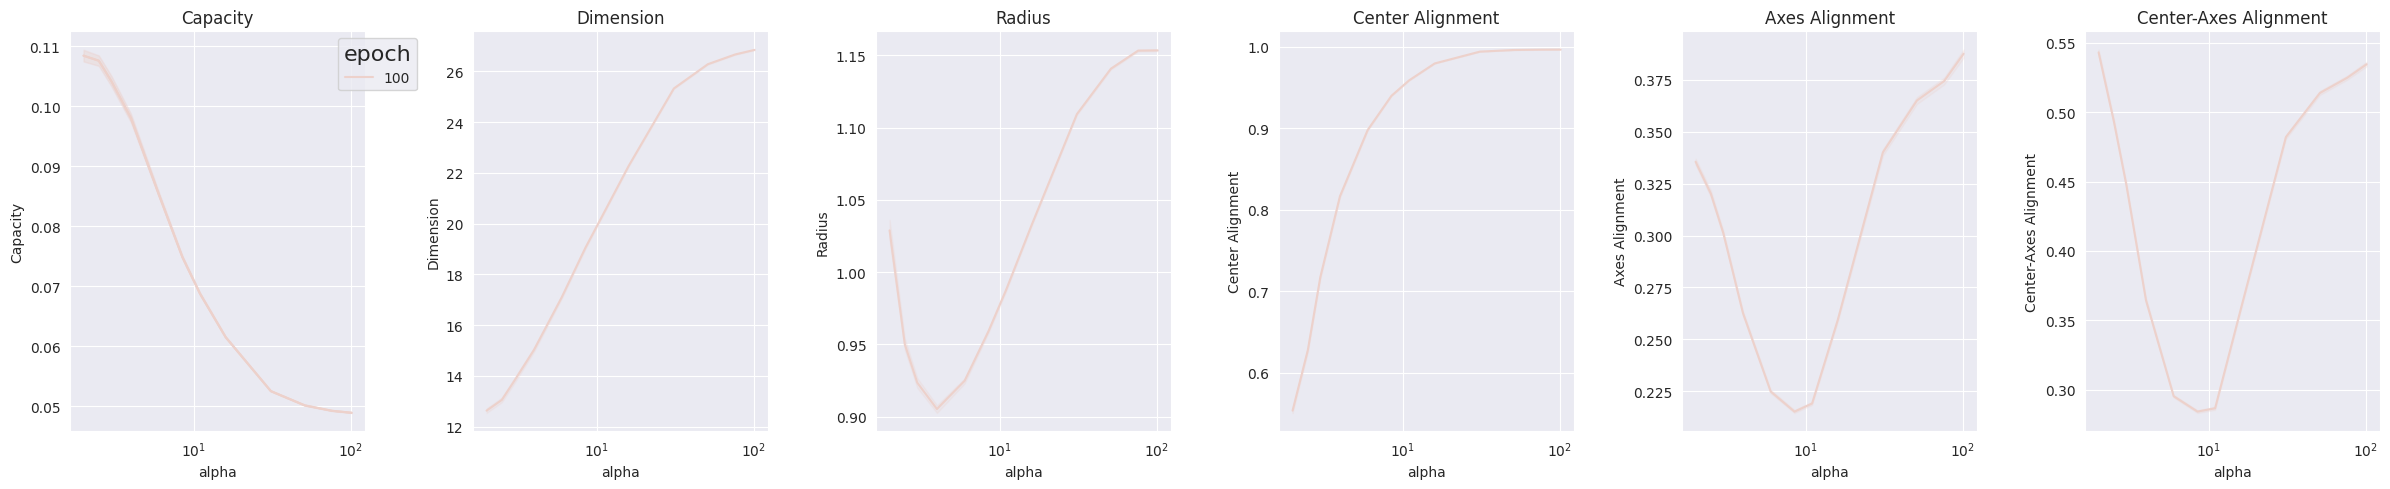

In [32]:
plot_df = capacity_corrupt_df[IDX_COLS+GEOMETRY_COLS]
fig = plot_results_sns(plot_df, "epoch", "alpha", GEOMETRY_COLS, figsize=(5,4))

## Fig 4C (Learning Stages Results)

In [33]:
# vgg11
capacity_step_folder = "/mnt/home/hlethi/ceph/learningGeometry_20240926/feature_analysis"
capacity_step_template = "result_alpha-{alpha}_decay-0.0_fsData-CIFAR-10_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-{seed}_subSeed-{subSeed}_task-CIFAR-10_epoch_{epoch}.pkl"
glob_pattern = "alpha-*_decay-0.0_fsData-CIFAR-10_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-*_subSeed-*_task-CIFAR-10"

In [34]:
capacity_step_df = plot_utils.load_results_to_df(capacity_step_folder, capacity_step_template, sub_folders=True, glob_pattern=glob_pattern)
for col in capacity_step_df.columns:
    if isinstance(capacity_step_df[col][0], np.ndarray):
        capacity_step_df[col] = capacity_step_df[col].apply(lambda x: x[0])

cache_filename='/mnt/home/hlethi/ceph/learningGeometry_20240926/feature_analysis/alpha-_decay-0.0_fsData-CIFAR-10_lr-1.0_model-VGG11_numCls-10_numSmpl-50_optim-SGD_sampleFunc-random_seed-_subSeed-_task-CIFAR-10.pkl'


In [35]:
cols = ['alpha', 'epoch', 'seed', 'capacity', 'dimension', 'radius',
       'center_alignment', 'axes_alignment', 'center_axes_alignment']
capacity_step_df = capacity_step_df[cols]
capacity_step_df = capacity_step_df.groupby(by=["alpha", "epoch", "seed"]).mean().reset_index()
capacity_step_df["eta"] = capacity_step_df["alpha"].apply(lambda x: round(1/x, 3))

In [36]:
capacity_step_df = capacity_step_df.rename(columns={key: val for (key,val) in RENAME_DICT.items() if key in capacity_step_df.columns})
capacity_step_df = capacity_step_df.rename(columns={"epoch": "Training Steps"})

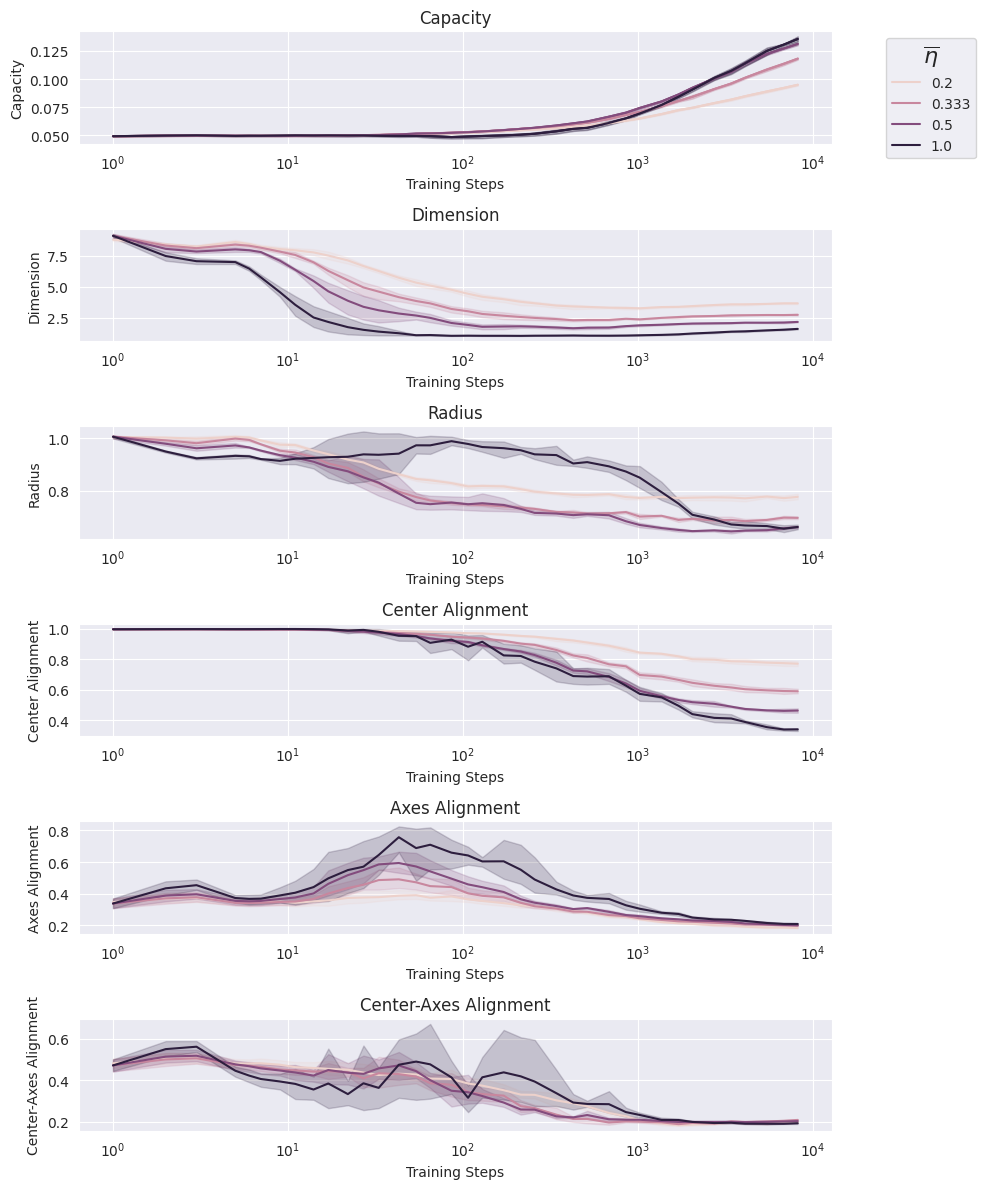

In [37]:
cols_to_plot = ['Capacity', 'Dimension', 'Radius', 'Center Alignment', 'Axes Alignment', 'Center-Axes Alignment']
fig = plot_results_sns(capacity_step_df, ETA_LATEX, "Training Steps", cols_to_plot, figsize=(2,10), horizontal=False)

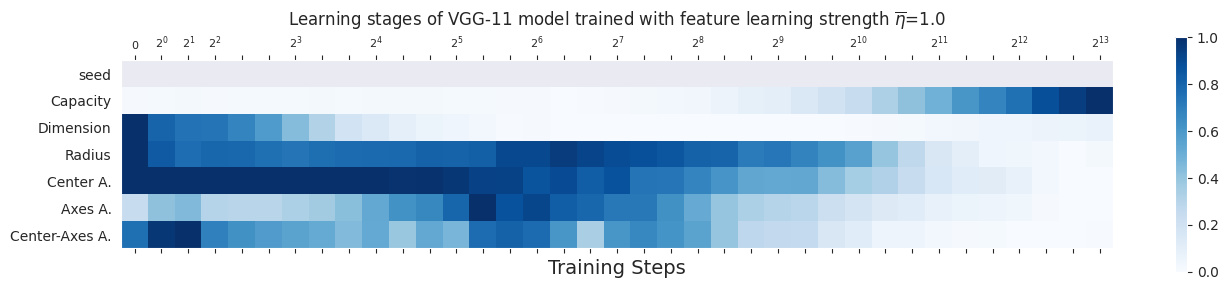

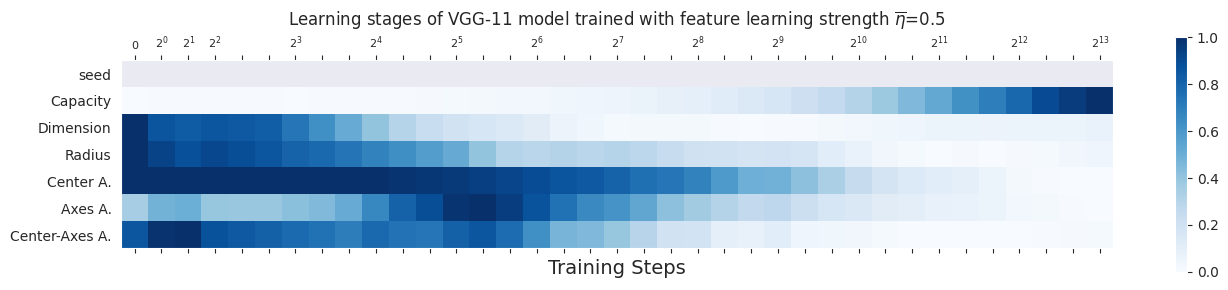

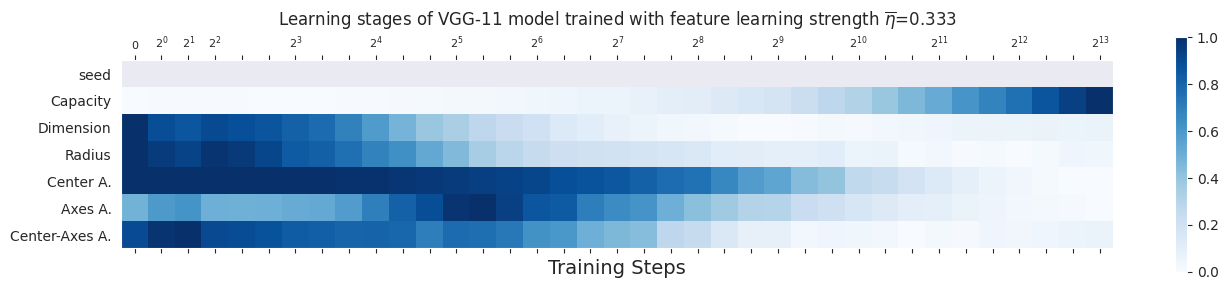

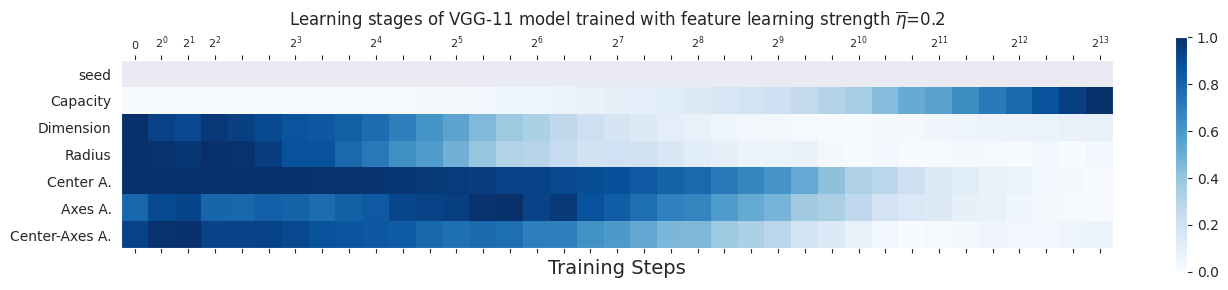

In [38]:
xticks = ["0", "$2^0$", "$2^1$", "$2^2$", "", "", "$2^3$", "", "", "$2^4$", "", "", "$2^5$", 
          "", "", "$2^6$", "", "", "$2^7$", "", "", "$2^8$", "", "", "$2^9$", "", "", "$2^{10}$",  "", "", "$2^{11}$",  "", "", "$2^{12}$",  "", "", "$2^{13}$"]
alphas = sorted(capacity_step_df["alpha"].unique())
figs = []
for alpha in alphas:
    this_capacity_df = capacity_step_df[capacity_step_df["alpha"] == alpha]
    this_capacity_df = this_capacity_df.groupby(["alpha", "Training Steps"]).mean().reset_index()
    this_capacity_df = this_capacity_df.sort_values("Training Steps")
    cols = ['Training Steps', 'seed', 'Capacity', 'Dimension', 'Radius',
       'Center Alignment', 'Axes Alignment', 'Center-Axes Alignment']
    this_capacity_df = this_capacity_df[cols]
    this_capacity_df = this_capacity_df.set_index("Training Steps")
    norm_capacity_df = this_capacity_df.copy()
    for col in this_capacity_df.columns:
        norm_capacity_df[col] = (norm_capacity_df[col] - norm_capacity_df[col].min()) / (norm_capacity_df[col].max() - norm_capacity_df[col].min())
    norm_capacity_df = norm_capacity_df.rename(columns={key: val for (key,val) in RENAME_DICT.items() if key in norm_capacity_df.columns})
    norm_capacity_df = norm_capacity_df.rename(columns={"Center Alignment": "Center A.", "Axes Alignment": "Axes A.", "Center-Axes Alignment": "Center-Axes A."})
    df = norm_capacity_df.T
    plt.matshow(df, cmap ="Blues")
    plt.colorbar() 
    # Assigning labels of x-axis according to dataframe 
    plt.xticks(range(len(df.columns)), xticks, fontsize=8)
    plt.xlabel("Training Steps", fontsize=14)
    # Assigning labels of y-axis according to dataframe 
    plt.yticks(range(len(df.index)), df.index) 
    # Displaying the figure
    plt.grid(False)
    plt.title(f"Learning stages of VGG-11 model trained with feature learning strength {ETA_LATEX}={round(1/alpha,3)}")
    figs.append(plt.gcf())
    plt.show()

## Fig 6 (OOD Results)

### Fig 6B

In [39]:
cifar_10_df = model_training_df[(model_training_df["epoch"] == MAX_EPOCH)]
cifar_100_df = linear_probe_max[(linear_probe_max["epoch"] == MAX_EPOCH)]
cifar_10c_df = eval_corrupt_df[(eval_corrupt_df["epoch"] == MAX_EPOCH)]
cifar_10c_df = cifar_10c_df.drop(columns=["corruption", "severity"]).groupby(["alpha", "seed"]).mean().reset_index() # take the mean accuracy across corruption and accuracy

In [40]:
cifar_10_df["dataset"] = "CIFAR-10"
cifar_100_df["dataset"] = "CIFAR-100"
cifar_10c_df["dataset"] = "CIFAR-10C"
col_names = ["alpha", "dataset", "test_acc", "seed"]
perf_df = pd.concat([cifar_10_df[col_names], cifar_100_df[col_names], cifar_10c_df[col_names]])
perf_df = perf_df.rename(columns={"test_acc": "Test Accuracy"})
perf_df["eta"] = perf_df["alpha"].apply(lambda x: round(1/x, 3)) #vgg
# perf_df["eta"] = perf_df["alpha"].apply(lambda x: round(0.2/x, 3)) #resnet
perf_df = perf_df.rename(columns={"eta": ETA_LATEX})
display(perf_df)

/tmp/ipykernel_569137/2351082430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cifar_10_df["dataset"] = "CIFAR-10"


,alpha,dataset,Test Accuracy,seed,$\overline{\eta}$
100,2.0,CIFAR-10,87.060000,37,0.500
201,5.0,CIFAR-10,81.530000,17,0.200
302,7.5,CIFAR-10,77.280000,17,0.133
403,7.5,CIFAR-10,76.660000,37,0.133
504,100.0,CIFAR-10,55.550000,13,0.010
...,...,...,...,...,...
55,100.0,CIFAR-10C,45.390400,7,0.010
56,100.0,CIFAR-10C,47.524533,13,0.010
57,100.0,CIFAR-10C,46.971467,17,0.010
58,100.0,CIFAR-10C,48.482933,37,0.010


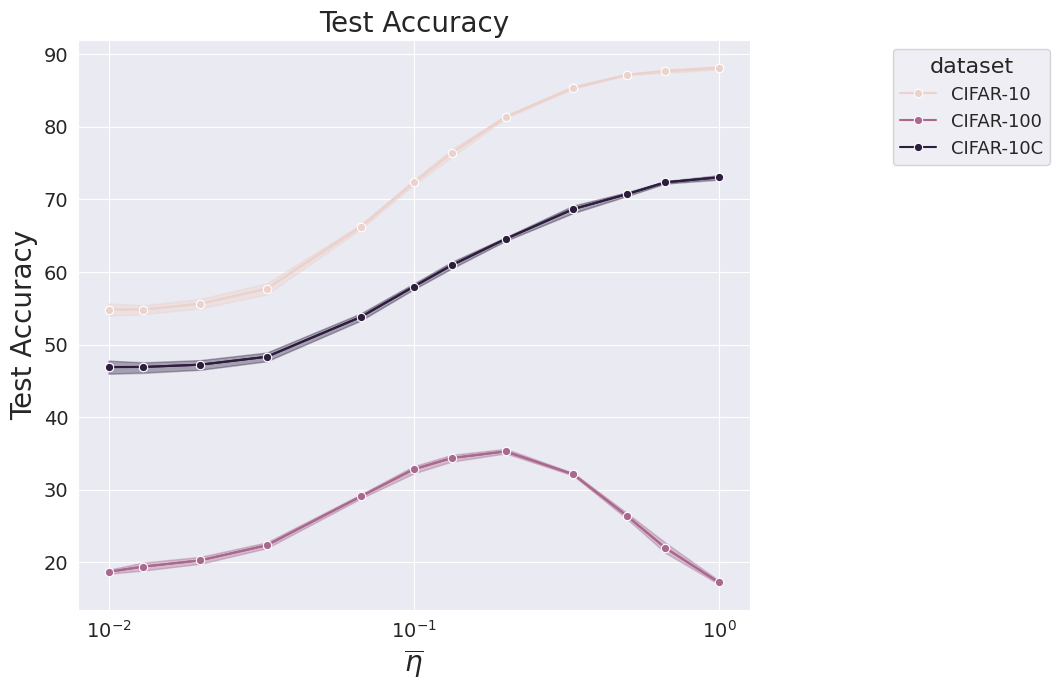

In [41]:
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
fig = plot_results_sns(perf_df,  "dataset", ETA_LATEX, ["Test Accuracy"], plus_one=False, figsize=(7,9), marker="o")

### Fig 6C

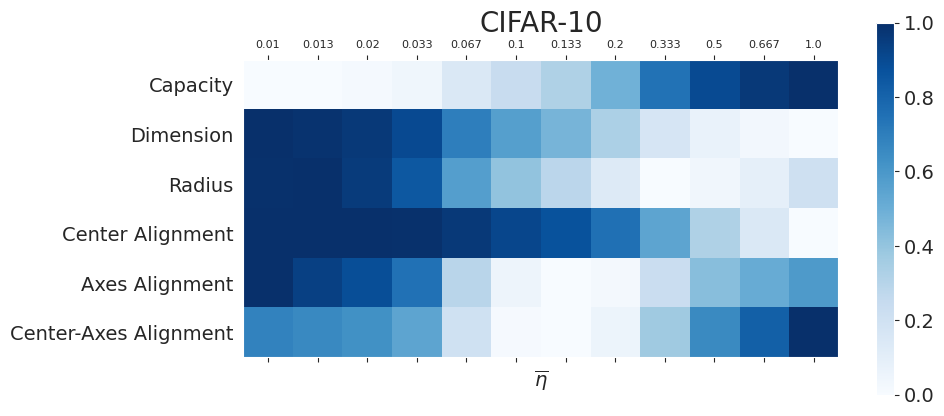

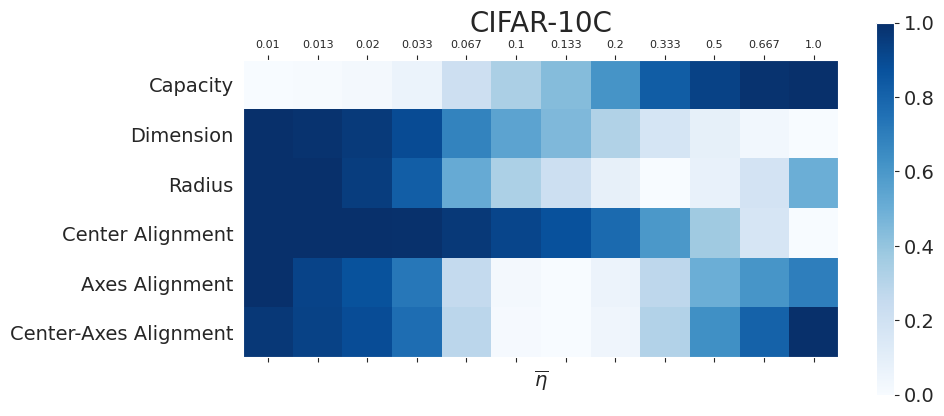

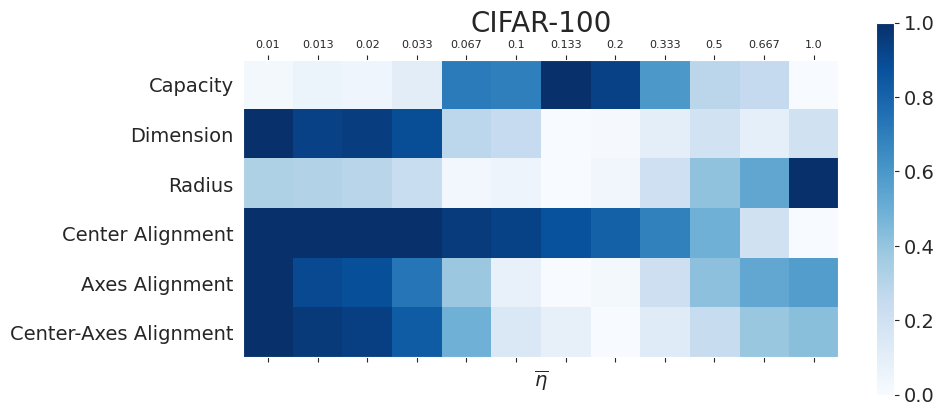

In [42]:
fig_6c_dict = {
    "CIFAR-10": capacity_df,
    "CIFAR-10C": capacity_corrupt_df,
    "CIFAR-100": lp_capacity_df,
}
for (dataset_name, result_df) in fig_6c_dict.items():
    this_capacity_df = result_df[IDX_COLS+GEOMETRY_COLS]
    this_capacity_df = this_capacity_df[this_capacity_df["epoch"] == MAX_EPOCH]
    this_capacity_df = this_capacity_df.groupby(["alpha"]).mean().reset_index().drop(columns=["epoch", "seed", "subSeed"])
    this_capacity_df["eta"] = this_capacity_df["alpha"].apply(lambda x: round(1/x, 3))
    this_capacity_df = this_capacity_df.drop(columns=["alpha"])
    this_capacity_df = this_capacity_df.set_index("eta")
    for col in this_capacity_df:
        this_capacity_df[col] = (this_capacity_df[col] - this_capacity_df[col].min()) / (this_capacity_df[col].max() - this_capacity_df[col].min())
    this_capacity_df = this_capacity_df.sort_index()
    plot_heatmap(this_capacity_df.T, title=dataset_name)
    plt.show()